      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  

C:\Users\chakri\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(354, 13)
(152, 13)
37.9925927703
         Coefficient
CRIM       -0.119859
ZN          0.044423
INDUS       0.011861
CHAS        2.512951
NOX       -16.271037
RM          3.849099
AGE        -0.009855
DIS        -1.500027
RAD         0.241508
TAX        -0.011067
PTRATIO    -1.018977
B           0.006953
LSTAT      -0.488111
MAE: 3.60826581341
MSE: 27.1838476476
RMSE: 5.2138131581


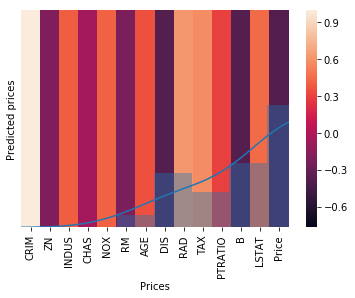

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

housing_data = load_boston()

#print(housing_data.keys())
#print(housing_data)
#print(housing_data["DESCR"])

boston = pd.DataFrame(housing_data.data)

#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names
boston.head()
print(boston.head())

#Adding the target column Price to the data frame
boston['Price'] = housing_data.target
boston.head()

#boston.info()
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

# Correlation between Different features
print(boston.corr())
sns.heatmap(boston.corr())

# Distributing of Price Column
sns.distplot(boston['Price'])

#Training a linear regression model
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
y = boston['Price']

#Now let's split the data into a training set and a testing set. 
#We will train out model on the training set and then use the test set to evaluate the model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

#Creating and training Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#Train/fit the model to training data
lr.fit(X_train,y_train)

# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

#Predictions from Model

pred = lr.predict(X_test)

plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

#Regression evaluation metrics
from sklearn import metrics
#Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
